In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ROIMeanReversion:
    """
    This class implements a mean reversion strategy for a given stock ticker.
    
    Parameters:
    ticker (str): Stock ticker symbol
    var (str): Stock variable to use (e.g. "Close" or "Adj Close")
    N (int): Rolling window size used to calculate mean reversion
    start_date (str): Start date for data retrieval in the format "YYYY-MM-DD"
    end_date (str): End date for data retrieval in the format "YYYY-MM-DD"
    interval (str): Interval size for data retrieval (e.g. "1d", "1wk", "1mo")
    
    Attributes:
    df (pandas.DataFrame): DataFrame containing stock data
    
    Methods:
    calculate_ROI(): Calculates the return on investment for the given stock
    calculate_N_period_ROI_MA(): Calculates a rolling window mean of the ROI
    create_buy_sell_conditions(): Creates buy and sell conditions based on the ROI mean
    plot_results(): Plots the stock data and buy/sell signals
    """
    def __init__(self, ticker, var, N, start_date = '2018-01-01', end_date = '2023-12-31', interval = '1wk'):
        self.ticker = ticker
        self.var = var
        self.N = N
        self.start_date = start_date
        self.end_date = end_date
        self.interval = interval
        self.df = yf.download(self.ticker, self.start_date, self.end_date, interval = self.interval)
        self.df.dropna(inplace=True)
        self.df = self.df[:-1].copy()
    
    def calculate_ROI(self):
        """
        Calculates the return on investment for the given stock.
        """
        self.df['roi'] = self.df[self.var] / self.df[self.var].shift(1) - 1

    def calculate_N_period_ROI_MA(self):
        """
        Calculates a rolling window mean of the ROI.
        """
        self.df['roi_ma'] = self.df['roi'].rolling(window=self.N).mean()

    def create_buy_sell_conditions(self):
        """
        Creates buy and sell conditions based on the ROI mean.
        """
        self.df.dropna(inplace=True)
        action = ['Nothing'] * self.N
        roi_ma = list(self.df['roi_ma'])
        for i in range(self.N,len(roi_ma)):
            buy_rate = np.percentile(roi_ma[:i], 10)
            sell_rate = np.percentile(roi_ma[:i], 90)
            if roi_ma[i] <= buy_rate:
                action.append('Buy')
            elif roi_ma[i] >= sell_rate:
                action.append('Sell')
            else:
                action.append('Nothing')
        self.df['action'] = action

    def plot_results(self):
        """
        Plots the stock data and buy/sell signals.
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12))
        # Plot Close price
        ax1.plot(self.df[self.var], color='blue', label='Close Price')
        # Plot Buy and Sell signals
        for index, row in self.df.iterrows():
            if row['action'] == 'Buy':
                ax1.scatter(index, row[self.var], color='green', label='Buy', s=100)
            elif row['action'] == 'Sell':
                ax1.scatter(index, row[self.var], color='red', label='Sell', s=100)
        # Set labels and legend
        ax2.plot(self.df['roi_ma'], color='Black', label='Close Price  ROI')
        # Plot Buy and Sell signals
        for index, row in self.df.iterrows():
            if row['action'] == 'Buy':
                ax2.scatter(index, row['roi_ma'], color='green', label='Buy', s=100)
            elif row['action'] == 'Sell':
                ax2.scatter(index, row['roi_ma'], color='red', label='Sell', s=100)
        # Ensure x axis doesn't overlap
        plt.tight_layout()
        # Show the plot
        plt.show()
        
    def buy_sell_stock(roi_mean_reversion):
        """
        Function that buys and sells a stock based on action.

        Parameters:
        roi_mean_reversion (ROIMeanReversion): Instance of ROIMeanReversion class

        Returns:
        (float): Profit or loss from stock trading
        """
        # Initialize profit/loss at 0
        profit_loss = 0
        # Initialize cost at 0
        cost = 0

        # Iterate over rows of df
        for index, row in roi_mean_reversion.df.iterrows():
            # If 'Buy' action, buy the stock and track cost
            if row['action'] == 'Buy':
                cost = row[roi_mean_reversion.var]
            # If 'Sell' action, sell the stock and track profit/loss
            elif row['action'] == 'Sell':
                profit_loss += row[roi_mean_reversion.var] - cost

        # Return profit/loss
        return profit_loss

[*********************100%***********************]  1 of 1 completed
Profit/Loss: 911.4300117492676


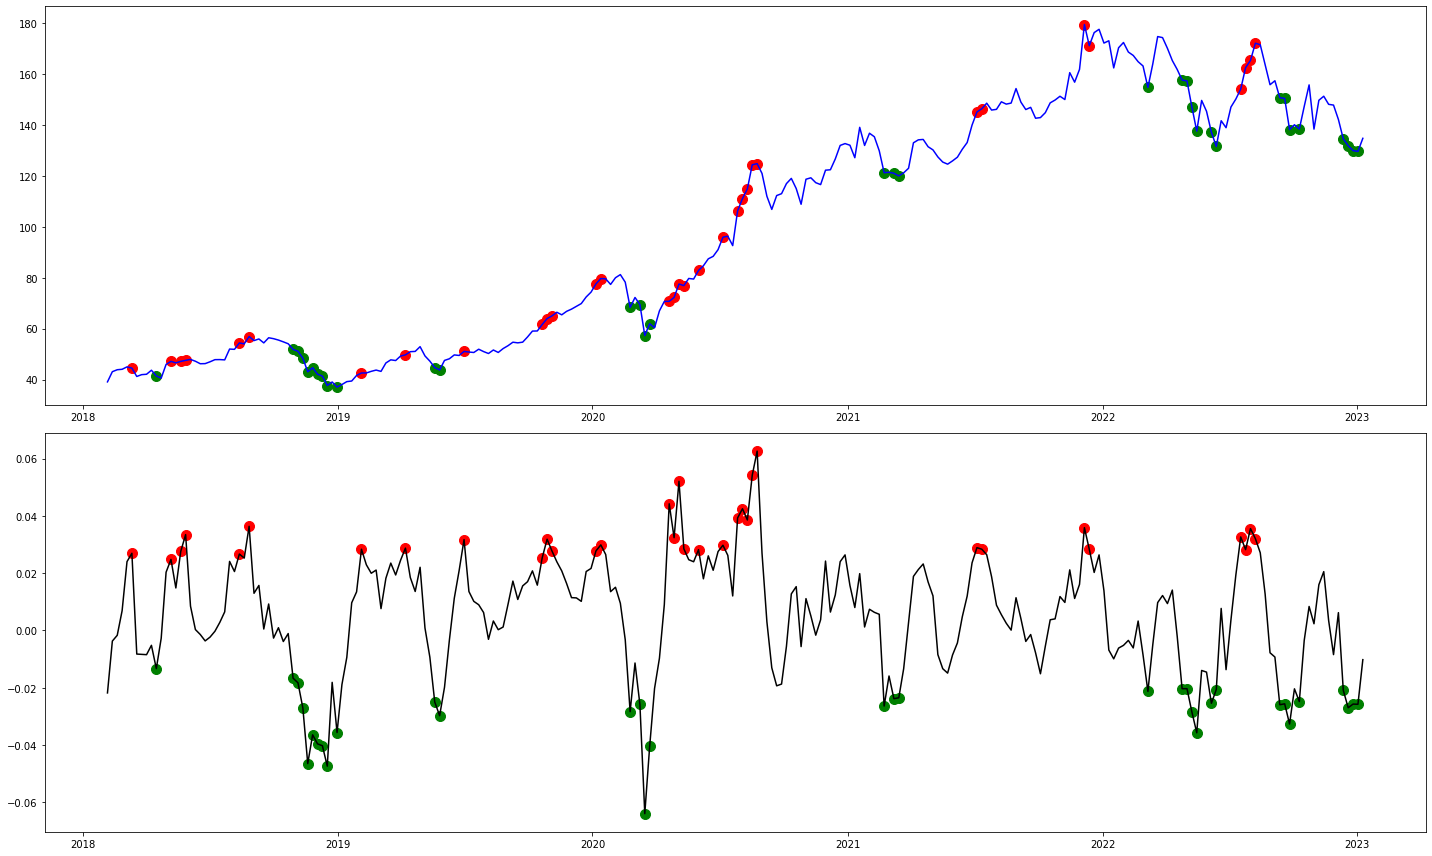

In [7]:
# Create an instance of the ROIMeanReversion class
roi_mean_reversion = ROIMeanReversion('AAPL', 'Close', 5)

# Calculate the ROI
roi_mean_reversion.calculate_ROI()

# Calculate the N period ROI MA
roi_mean_reversion.calculate_N_period_ROI_MA()

# Create buy and sell conditions
roi_mean_reversion.create_buy_sell_conditions()

# Calculate profit/loss from stock trading
profit_loss = roi_mean_reversion.buy_sell_stock()

print("Profit/Loss: {}".format(profit_loss))

roi_mean_reversion.plot_results()

In [54]:
# function 1
# calculate the ROI
var = 'Close'
df['roi'] = df[var] / df[var].shift(1) - 1

# function 2
# calculate the N period ROI_MA
N = 7
df['roi_ma'] = df['roi'].rolling(window=N).mean()

# function 3
# create buy sell conditions
df.dropna(inplace=True)

action = ['Nothing'] * N
roi_ma = list(df['roi_ma'])
for i in range(N,len(roi_ma)):
    buy_rate = np.percentile(roi_ma[:i], 10)
    sell_rate = np.percentile(roi_ma[:i], 90)
    if roi_ma[i] <= buy_rate:
        action.append('Buy')
    elif roi_ma[i] >= sell_rate:
        action.append('Sell')
    else:
        action.append('Nothing')
df['action'] = action

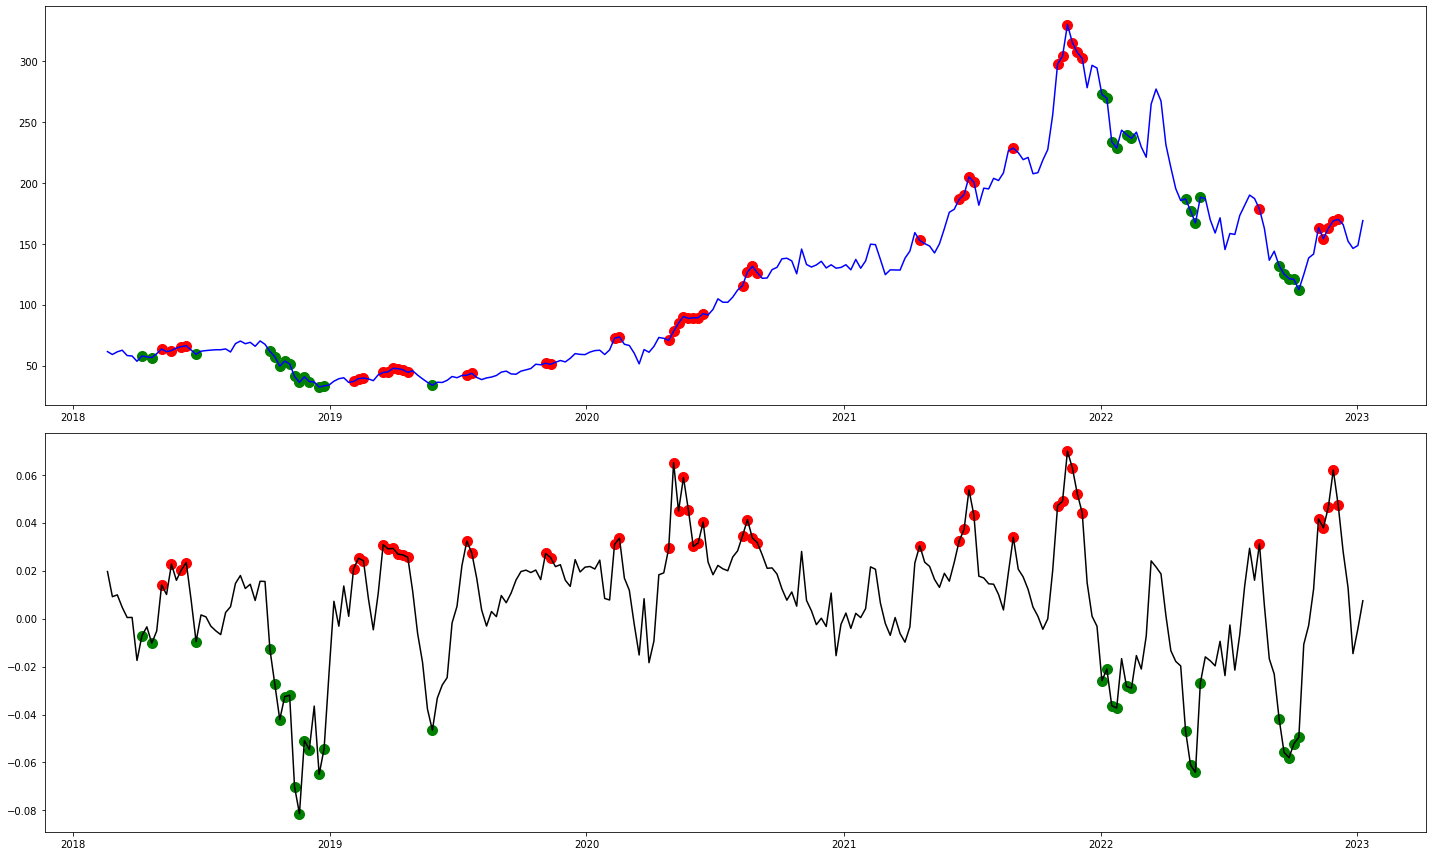

In [46]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12))


# Plot Close price
ax1.plot(df['Close'], color='blue', label='Close Price')

# Plot Buy and Sell signals
for index, row in df.iterrows():
    if row['action'] == 'Buy':
        ax1.scatter(index, row['Close'], color='green', label='Buy', s=100)
    elif row['action'] == 'Sell':
        ax1.scatter(index, row['Close'], color='red', label='Sell', s=100)

# # Set labels and legend
# ax1.title('Close Price and Buy/Sell Signals')
# ax1.xlabel('Date')
# ax1.ylabel('Price')


ax2.plot(df['roi_ma'], color='Black', label='Close Price  ROI')

# Plot Buy and Sell signals
for index, row in df.iterrows():
    if row['action'] == 'Buy':
        ax2.scatter(index, row['roi_ma'], color='green', label='Buy', s=100)
    elif row['action'] == 'Sell':
        ax2.scatter(index, row['roi_ma'], color='red', label='Sell', s=100)


# Ensure x axis doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()

In [56]:

class ROIMeanReversion:
    def __init__(self, ticker, var, N, start_date = '2018-01-01', end_date = '2023-12-31', interval = '1wk'):
        self.ticker = ticker
        self.var = var
        self.N = N
        self.start_date = start_date
        self.end_date = end_date
        self.interval = interval
        self.df = yf.download(self.ticker, self.start_date, self.end_date, interval = self.interval)
        self.df.dropna(inplace=True)
        self.df = self.df[:-1].copy()
    
    def calculate_ROI(self):
        self.df['roi'] = self.df[self.var] / self.df[self.var].shift(1) - 1

    def calculate_N_period_ROI_MA(self):
        self.df['roi_ma'] = self.df['roi'].rolling(window=self.N).mean()

    def create_buy_sell_conditions(self):
        self.df.dropna(inplace=True)
        action = ['Nothing'] * self.N
        roi_ma = list(self.df['roi_ma'])
        for i in range(self.N,len(roi_ma)):
            buy_rate = np.percentile(roi_ma[:i], 10)
            sell_rate = np.percentile(roi_ma[:i], 90)
            if roi_ma[i] <= buy_rate:
                action.append('Buy')
            elif roi_ma[i] >= sell_rate:
                action.append('Sell')
            else:
                action.append('Nothing')
        self.df['action'] = action

    def plot_results(self):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12))
        # Plot Close price
        ax1.plot(self.df[self.var], color='blue', label='Close Price')
        # Plot Buy and Sell signals
        for index, row in self.df.iterrows():
            if row['action'] == 'Buy':
                ax1.scatter(index, row[self.var], color='green', label='Buy', s=100)
            elif row['action'] == 'Sell':
                ax1.scatter(index, row[self.var], color='red', label='Sell', s=100)
        # Set labels and legend
        ax2.plot(self.df['roi_ma'], color='Black', label='Close Price  ROI')
        # Plot Buy and Sell signals
        for index, row in self.df.iterrows():
            if row['action'] == 'Buy':
                ax2.scatter(index, row['roi_ma'], color='green', label='Buy', s=100)
            elif row['action'] == 'Sell':
                ax2.scatter(index, row['roi_ma'], color='red', label='Sell', s=100)
        # Ensure x axis doesn't overlap
        plt.tight_layout()
        # Show the plot
        plt.show()

[*********************100%***********************]  1 of 1 completed


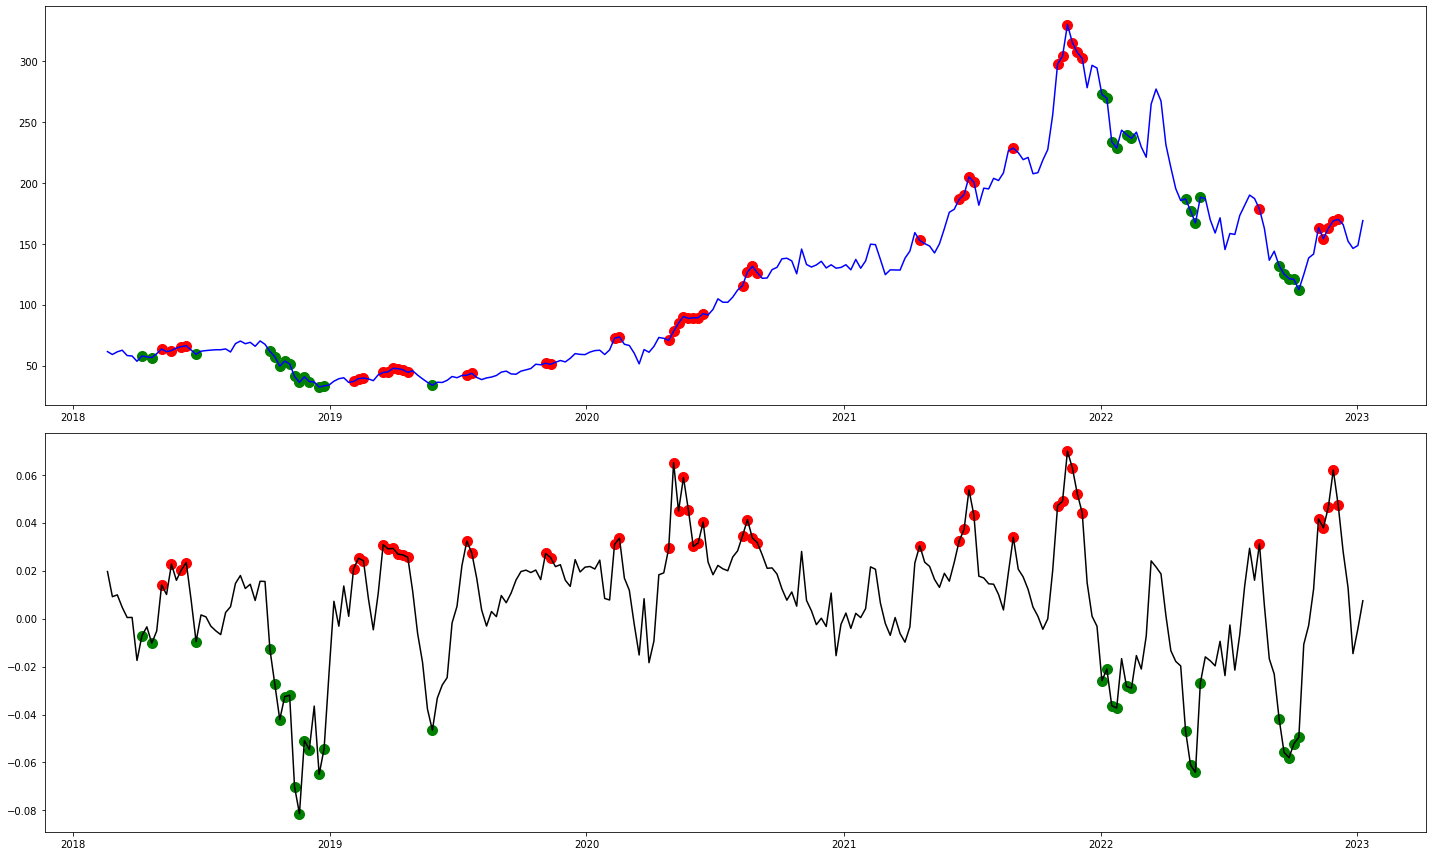

In [58]:
#instantiating the class
NVDA_analysis = ROIMeanReversion('NVDA', 'Close', 7)

#running the functions
NVDA_analysis.calculate_ROI()
NVDA_analysis.calculate_N_period_ROI_MA()
NVDA_analysis.create_buy_sell_conditions()
NVDA_analysis.plot_results()

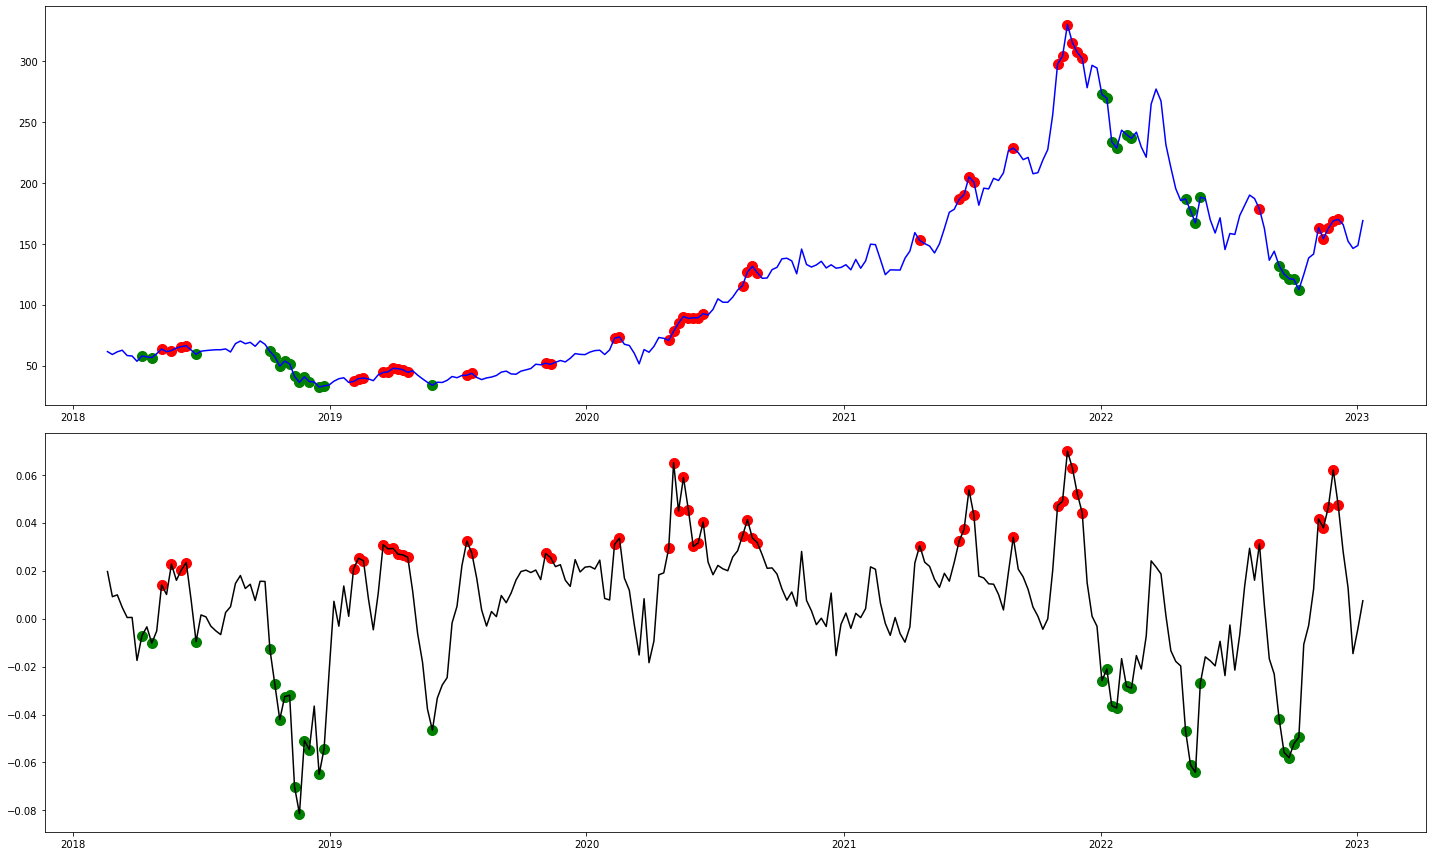

In [ ]:
# class ROIMeanReversion:
#     def __init__(self, prices, ROI_MA):
#         self.prices = pd.Series(prices)
#         self.ROI_MA = ROI_MA
#         self.buy_list = []
#         self.sell_list = []
#         self.ROI = []
        
#     def calculate_ROI(self):
#         """Calculates return on investment (ROI) for given prices"""
#         self.ROI = (self.prices - self.prices.shift(1))/self.prices.shift(1)
#         self.ROI = [0 if np.isnan(x) else x for x in self.ROI]
#         return self.ROI
        
#     def calculate_ROI_MA(self):
#         """Calculates the moving average ROI for the given prices"""
#         MA = pd.Series(self.ROI).rolling(window=self.ROI_MA).mean()
#         return MA
    
#     def identify_buys_and_sells(self):
#         """Identifies buys and sells according to the ROI mean reversion strategy"""
#         for i in range(len(self.calculate_ROI_MA())):
#             if self.calculate_ROI()[i] < self.calculate_ROI_MA()[i]:
#                 self.buy_list.append(self.prices[i])
#             elif self.calculate_ROI()[i] > self.calculate_ROI_MA()[i]:
#                 self.sell_list.append(self.prices[i])
#         return self.buy_list, self.sell_list

In [8]:
class ROIMeanReversion:
    def __init__(self, prices, ROI_MA):
        self.prices = pd.Series(prices)
        self.ROI_MA = ROI_MA
        self.buy_list = []
        self.sell_list = []
        self.ROI = []
        self.df = pd.DataFrame(columns = ['roi_ma', 'action'])
        
    def calculate_ROI(self):
        """Calculates return on investment (ROI) for given prices"""
        self.ROI = (self.prices - self.prices.shift(1))/self.prices.shift(1)
        self.ROI = [0 if np.isnan(x) else x for x in self.ROI]
        return self.ROI
        
    def calculate_ROI_MA(self):
        """Calculates the moving average ROI for the given prices"""
        MA = pd.Series(self.ROI).rolling(window=self.ROI_MA).mean()
        return MA
    
    def identify_buys_and_sells(self):
        """Identifies buys and sells according to the ROI mean reversion strategy"""
        if self.calculate_ROI_MA().empty:
            return 'Empty Array'
        else:
            for i in range(len(self.calculate_ROI_MA())):
                if self.calculate_ROI()[i] < self.calculate_ROI_MA()[i]:
                    self.buy_list.append(self.prices[i])
                elif self.calculate_ROI()[i] > self.calculate_ROI_MA()[i]:
                    self.sell_list.append(self.prices[i])
            self.df['roi_ma'] = self.calculate_ROI_MA()
            buy_rate = np.percentile(self.df['roi_ma'], 10)
            sell_rate = np.percentile(self.df['roi_ma'], 90)
            self.df['action'] = 'Nothing'
            self.df.loc[self.df['roi_ma']<= buy_rate,'action'] = 'Buy'
            self.df.loc[self.df['roi_ma']>= sell_rate,'action'] = 'Sell'
            return self.df

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
spy = yf.download('SPY','2020-01-01','2023-12-31', interval = '1wk')

# Prices of a security over 10 days
prices = list(spy['Close'])
# Moving average of the return on investment (ROI) over the last 5 days
ROI_MA = 5

# Create instance of the ROI mean reversion strategy
roi_mean_reversion = ROIMeanReversion(prices, ROI_MA)

roi_mean_reversion.identify_buys_and_sells()

[*********************100%***********************]  1 of 1 completed


<ipython-input-8-bc114e752439>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  MA = pd.Series(self.ROI).rolling(window=self.ROI_MA).mean()


'Empty Array'

In [3]:

# Prices of a security over 10 days
prices = list(spy['Close'])
# Moving average of the return on investment (ROI) over the last 5 days
ROI_MA = 5

# Create instance of the ROI mean reversion strategy
roi_mean_reversion = ROIMeanReversion(prices, ROI_MA)

# Calculate ROI
roi = roi_mean_reversion.calculate_ROI()

# Calculate Moving Average of ROI
roi_ma = roi_mean_reversion.calculate_ROI_MA()

# Identify buys and sells
buys, sells = roi_mean_reversion.identify_buys_and_sells()


[*********************100%***********************]  1 of 1 completed


In [4]:
roi_ma

0           NaN
1           NaN
2           NaN
3           NaN
4      0.003942
         ...   
167   -0.007237
168   -0.006833
169   -0.005841
170    0.008877
171    0.008877
Length: 172, dtype: float64

In [5]:
df = spy[ROI_MA:].copy()
df['roi_ma'] = roi_ma[ROI_MA:]

buy_rate = np.percentile(roi_ma, 10)
sell_rate = np.percentile(roi_ma, 90)

df['action'] = 'Nothing'
df.loc[df['roi_ma']<= buy_rate,'action'] = 'Buy'
df.loc[df['roi_ma']>= sell_rate,'action'] = 'Sell'

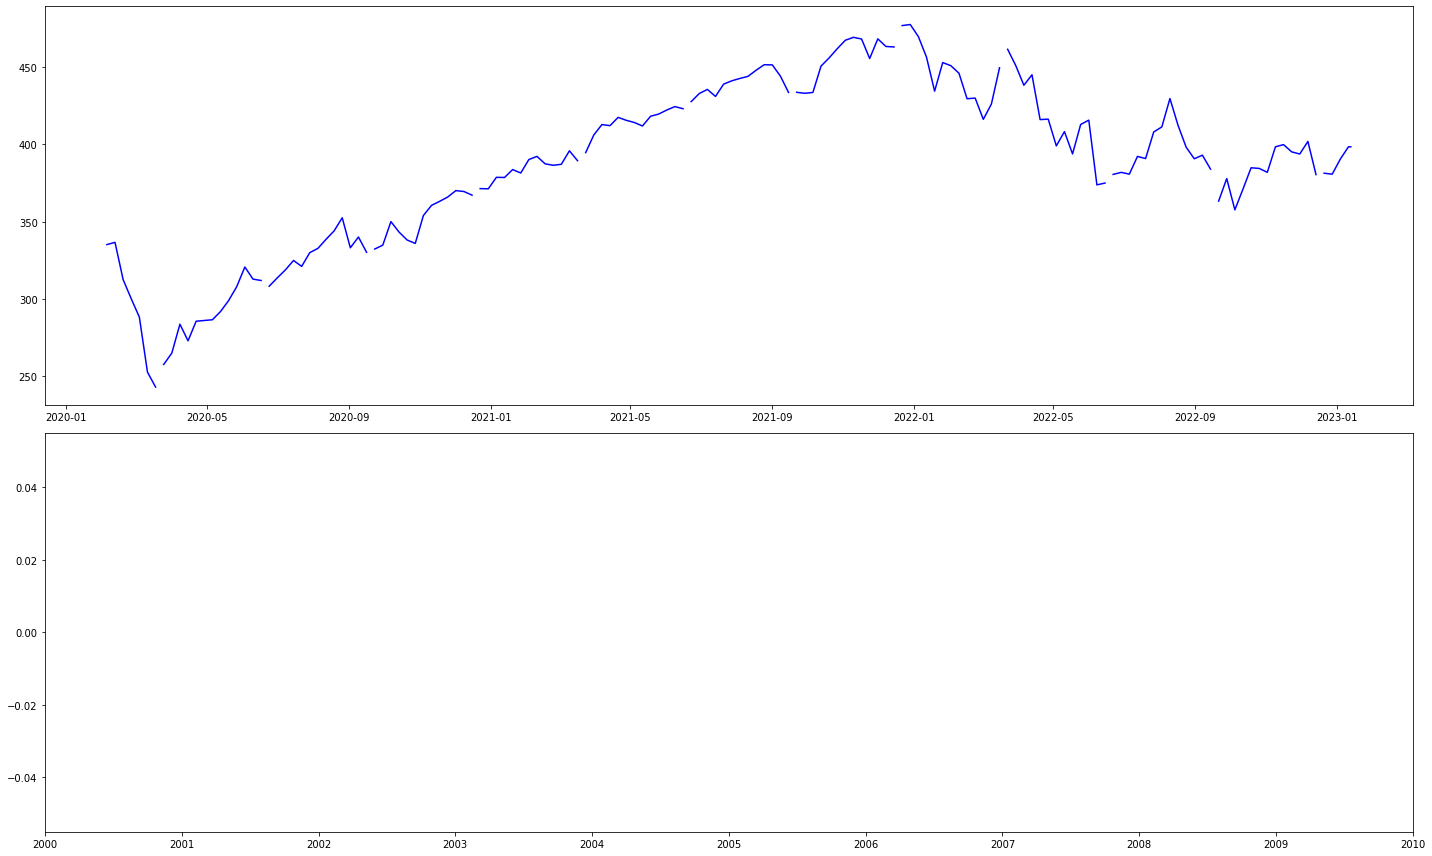

In [6]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,12))


# Plot Close price
ax1.plot(df['Close'], color='blue', label='Close Price')

# Plot Buy and Sell signals
for index, row in df.iterrows():
    if row['action'] == 'Buy':
        ax1.scatter(index, row['Close'], color='green', label='Buy', s=100)
    elif row['action'] == 'Sell':
        ax1.scatter(index, row['Close'], color='red', label='Sell', s=100)

# # Set labels and legend
# ax1.title('Close Price and Buy/Sell Signals')
# ax1.xlabel('Date')
# ax1.ylabel('Price')


ax2.plot(df['roi_ma'], color='Black', label='Close Price  ROI')

# Plot Buy and Sell signals
for index, row in df.iterrows():
    if row['action'] == 'Buy':
        ax2.scatter(index, row['roi_ma'], color='green', label='Buy', s=100)
    elif row['action'] == 'Sell':
        ax2.scatter(index, row['roi_ma'], color='red', label='Sell', s=100)


# Ensure x axis doesn't overlap
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
df['roi_ma']

Date
2020-02-05   NaN
2020-02-12   NaN
2020-02-19   NaN
2020-02-26   NaN
2020-03-04   NaN
              ..
2022-12-21   NaN
2022-12-28   NaN
2023-01-04   NaN
2023-01-11   NaN
2023-01-13   NaN
Name: roi_ma, Length: 167, dtype: float64

In [8]:
len(roi_ma[ROI_MA:])

167

In [9]:
df['roi_ma'] = roi_ma

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume,roi_ma,action
Date,,,,,,,,
2020-02-05,332.269989,337.019989,330.670013,335.260010,319.599609,2.773847e+08,NaN,Nothing
2020-02-12,336.829987,338.119995,335.209991,336.730011,321.000916,2.203030e+08,NaN,Nothing
2020-02-19,337.790009,339.079987,311.690002,312.649994,298.045715,6.167679e+08,NaN,Nothing
2020-02-26,314.179993,318.109985,285.540009,300.239990,286.215393,1.402946e+09,NaN,Nothing
2020-03-04,306.119995,313.100006,273.450012,288.420013,274.947571,1.177509e+09,NaN,Nothing
...,...,...,...,...,...,...,...,...
2022-12-21,383.250000,387.410004,374.769989,381.399994,381.399994,2.897838e+08,NaN,Nothing
2022-12-28,381.329987,386.429993,376.420013,380.820007,380.820007,2.967082e+08,NaN,Nothing
2023-01-04,383.179993,393.700012,378.760010,390.579987,390.579987,4.062821e+08,NaN,Nothing
